<a href="https://colab.research.google.com/github/amgabatbayar/Uczenie-Maszynowe-w-Finansach---Marcin-Batbayar/blob/UseCase2/case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install surprise
from surprise import SVD, KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

## Przygotowanie danych

In [65]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')
movies[8210:8300]

,movieId,title,genres
8210,103543,"Lifeguard, The (2013)",Comedy|Drama
8211,103596,Sharknado (2013),Sci-Fi
8212,103602,Craig Ferguson: I'm Here To Help (2013),Comedy|Documentary
8213,103606,Stuck in Love (2012),Comedy|Drama|Romance
8214,103609,Class Act (1992),Comedy
...,...,...,...
8295,106487,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX
8296,106489,"Hobbit: The Desolation of Smaug, The (2013)",Adventure|Fantasy|IMAX
8297,106491,47 Ronin (2013),Action|Adventure|Fantasy
8298,106540,Delivery Man (2013),Comedy


In [66]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [67]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [68]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## 1.1 Podaj liczbę filmów Sci-Fi

In [69]:
sci_fi = movies[movies['genres'].str.contains('Sci-Fi')]
sci_fi_count = sci_fi.shape[0]
sci_fi_count
print(f"Ilość filmów Sci-Fi: {sci_fi_count}")

Ilość filmów Sci-Fi: 980


## 1.2 Pokaż rozkład ocen komedii

<ipython-input-70-a936a50247a6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x='rating', palette="viridis")


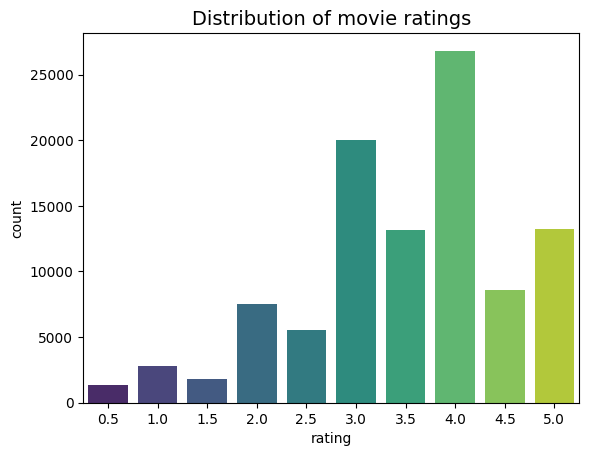

In [70]:
sns.countplot(data=ratings, x='rating', palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

## 1.3 Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej ocenianych

In [71]:
# Filtuje filmy akcji
action_movies = movies[movies['genres'].str.contains('Action')]

# Łącze df z ocenami
action_movies = pd.merge(action_movies, ratings, on='movieId')

# Średnia dla każdego filmu
srednia_akcji = action_movies['rating'].mean()

# Średnia globalna
avg_ratings = action_movies.groupby('title')['rating'].mean()
# top3
top3 = avg_ratings.nlargest(3)

print(f"Średnia dla filmów akcji wynosi: {srednia_akcji}")
print(f"To są 3 najwyżej oceniane filmy: {top3}")


Średnia dla filmów akcji wynosi: 3.447984331646809
To są 3 najwyżej oceniane filmy: title
Alien Contamination (1980)                                         5.0
Assignment, The (1997)                                             5.0
Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)    5.0
Name: rating, dtype: float64


In [92]:
# 2 metoda
movie_ratings = ratings.merge(movies[movies['genres'].str.contains('Action')], on='movieId')
rating_akcji = movie_ratings['rating'].mean()

# Teraz obliczamy średnią ocen dla każdego filmu akcji oraz liczbę głosów
srednia = movie_ratings.groupby('title').agg({'rating': ['mean', 'count']}).reset_index()

# df
srednia.columns = ['title', 'mean_rating', 'count_rating']

# Sortujemy filmy akcji według średniej oceny, ale tylko te z liczbą głosów wyższą od ustalonego progu

sortowanie1 = srednia[srednia['count_rating'] >= 17]
sortowanie2 = srednia[srednia['count_rating'] >= 50]

# Wybieramy trzy filmy akcji z najwyższą średnią oceną
top3_sort1 = sortowanie1.sort_values(by='mean_rating', ascending=False).head(3)
top3_sort2 = sortowanie2.sort_values(by='mean_rating', ascending=False).head(3)

print(f"Według tej metody to są 3 najwyżej oceniane filmy:\n{top3_sort1}")
print(f"Według tej metody to są 3 najwyżej oceniane filmy:\n{top3_sort2}")
print(f"Średnia ilość głosów na film akcji to: 17, dlatego tutaj przyjąłem próg 17 oraz 50 - ale to już mój pomysł")

Według tej metody to są 3 najwyżej oceniane filmy:
                                                  title  mean_rating  \
1173  Once Upon a Time in the West (C'era una volta ...     4.305556   
972                                        Logan (2017)     4.280000   
551                                   Fight Club (1999)     4.272936   

      count_rating  
1173            18  
972             25  
551            218  
Według tej metody to są 3 najwyżej oceniane filmy:
                           title  mean_rating  count_rating
551            Fight Club (1999)     4.272936           218
374      Dark Knight, The (2008)     4.238255           149
1255  Princess Bride, The (1987)     4.232394           142
Średnia ilość głosów na film akcji to: 17, dlatego tutaj przyjąłem próg 17 oraz 50 - ale to już mój pomysł


## 2.1 Zbuduj system na podstawie algorytmu SVD oraz kNNwithMeans

In [72]:
reader = Reader(rating_scale=(ratings['rating'].min(), ratings['rating'].max()))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8755  0.8730  0.8776  0.8687  0.8757  0.8741  0.0031  
MAE (testset)     0.6730  0.6707  0.6732  0.6670  0.6741  0.6716  0.0025  
Fit time          1.60    2.76    3.81    3.45    2.88    2.90    0.75    
Test time         0.14    0.31    0.52    0.27    0.28    0.30    0.12    


{'test_rmse': array([0.87548119, 0.87295569, 0.87757657, 0.8687279 , 0.87571647]),
 'test_mae': array([0.67297195, 0.670747  , 0.67318701, 0.6670295 , 0.67412118]),
 'fit_time': (1.6044189929962158,
  2.759260416030884,
  3.8051936626434326,
  3.450242519378662,
  2.875559091567993),
 'test_time': (0.1389484405517578,
  0.30632615089416504,
  0.5242612361907959,
  0.272066593170166,
  0.2759366035461426)}

In [73]:
knn = KNNWithMeans()
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8919  0.9019  0.8969  0.8946  0.9001  0.8971  0.0036  
MAE (testset)     0.6835  0.6901  0.6858  0.6822  0.6867  0.6857  0.0027  
Fit time          0.15    0.17    0.23    0.17    0.17    0.18    0.03    
Test time         1.47    2.16    1.67    1.47    1.48    1.65    0.27    


{'test_rmse': array([0.8919131 , 0.90192426, 0.89690423, 0.89462656, 0.90008884]),
 'test_mae': array([0.6835003 , 0.69012164, 0.68578882, 0.68218785, 0.68669912]),
 'fit_time': (0.1495811939239502,
  0.16752934455871582,
  0.23136043548583984,
  0.16976475715637207,
  0.1708543300628662),
 'test_time': (1.4672667980194092,
  2.1634650230407715,
  1.6728808879852295,
  1.4692561626434326,
  1.4759125709533691)}

## 2.2 Czym różni się algorytm kNN with means od standardowego kNN?
kNN: Przypisuje nowy punkt do klasy na podstawie etykiet najbliższych sąsiadów.

kNN with means: Oprócz etykiet, uwzględnia również średnią wartość cech sąsiadów, w tym przypadku uwzględnia średnią ocenę.

W standardowym algorytmie kNN, przypisujemy nowy punkt do klasy na podstawie etykiet jego najbliższych sąsiadów. Jednak w przypadku kNN with means, obliczamy również średnią wartość cech dla tych sąsiadów i używamy jej do przewidywania klasy

## 2.3 Wykorzystaj metodę hiperparametryzacji GridSearch do wyboru liczby sąsiadów od 2-6

## dla kNNwithMeans

In [77]:
#KNN
reader = Reader(rating_scale=(ratings['rating'].min(), ratings['rating'].max()))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


param_grid = {'k': [2, 3, 4, 5, 6]}


gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)


gs.fit(data)

best_rmse = gs.best_score['rmse']
best_params = gs.best_params['rmse']

print("Best RMSE: ", best_rmse)
print("Best parameters: ", best_params)

Best RMSE:  0.9292948791810014
Best parameters:  {'k': 6}


## 3. Rekomendacje

In [105]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
model = KNNWithMeans()
model.fit(trainset)


def get_similar_movies(movie_title, k=6):
  movie_id = movies[movies['title'].str.contains(movie_title)].iloc[0]['movieId']
  neighbors = model.get_neighbors(movie_id, k=k)
  neighbor_movies = movies[movies['movieId'].isin(neighbors)]
  return neighbor_movies


reko_jumanji = get_similar_movies('Jumanji')
reko_flint = get_similar_movies('Flint')

print("Rekomendacje 'Jumanji':\n", reko_jumanji)
print("Rekomendacje 'Flint':\n", reko_flint)

Computing the msd similarity matrix...
Done computing similarity matrix.
Rekomendacje 'Jumanji':
      movieId                                   title                genres
66        74                     Bed of Roses (1996)         Drama|Romance
262      302  Queen Margot (Reine Margot, La) (1994)         Drama|Romance
301      343           Baby-Sitters Club, The (1995)              Children
383      440                             Dave (1993)        Comedy|Romance
384      441               Dazed and Confused (1993)                Comedy
397      456                            Fresh (1994)  Crime|Drama|Thriller
Rekomendacje 'Flint':
      movieId                          title             genres
106      122               Boomerang (1992)     Comedy|Romance
208      242  Farinelli: il castrato (1994)      Drama|Musical
213      249        Immortal Beloved (1994)      Drama|Romance
404      466    Hot Shots! Part Deux (1993)  Action|Comedy|War
